# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

## Loading Libraries

In [3]:
import pandas as pd

# EDA Library
import numpy as np
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns

# Model Development Libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

## Data Prepartaion

### Data Loading

In [6]:
df = pd.read_csv("Data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


### Data Exploration
- Check the dimensions of the dataset (number of rows and columns).
- Inspect the first few rows of the dataset to get an overview of the data.
- Review the column names and data types to understand the variables present.
- Check for missing values, duplicates, and any obvious data quality issues.
- Calculate basic statistics (e.g., mean, median, min, max) for numeric columns to understand their distribution.
- Plot histograms or box plots for numeric variables and bar plots for categorical variables to visualize their distributions.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_passengers,50000.0,1.591240,1.020165,1.00,1.00,1.00,2.00,9.0
purchase_lead,50000.0,84.940480,90.451378,0.00,21.00,51.00,115.00,867.0
length_of_stay,50000.0,23.044560,33.887670,0.00,5.00,17.00,28.00,778.0
flight_hour,50000.0,9.066340,5.412660,0.00,5.00,9.00,13.00,23.0
wants_extra_baggage,50000.0,0.668780,0.470657,0.00,0.00,1.00,1.00,1.0
wants_preferred_seat,50000.0,0.296960,0.456923,0.00,0.00,0.00,1.00,1.0
wants_in_flight_meals,50000.0,0.427140,0.494668,0.00,0.00,0.00,1.00,1.0
flight_duration,50000.0,7.277561,1.496863,4.67,5.62,7.57,8.83,9.5
booking_complete,50000.0,0.149560,0.356643,0.00,0.00,0.00,0.00,1.0


In [10]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [11]:
df.duplicated().sum()

719

In [12]:
df.shape

(50000, 14)

In [13]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [14]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [15]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [16]:
df["booking_complete"].unique()

array([0, 1])

In [17]:
counts = df.groupby('booking_complete').size().reset_index(name='counts')
print(counts)

   booking_complete  counts
0                 0   42522
1                 1    7478


### Data Cleaning and Preprocessing
- Handle missing values
- Remove duplicates
- Standardize formats
- Address outliers

In [19]:
# Aggregate information from duplicate rows
df = df.groupby(df.columns.tolist(), as_index=False).size()

## Exploratory Data Analysis

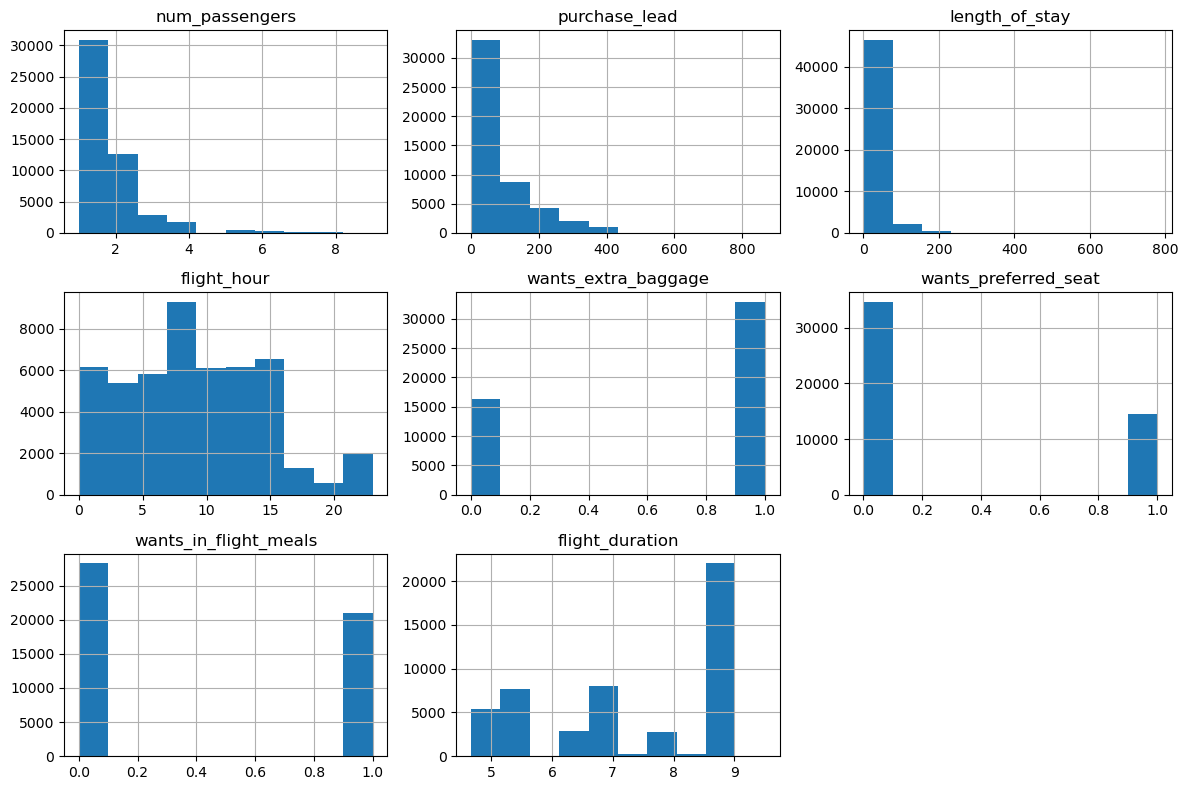

In [21]:
# Plot histograms for numeric variables
numeric_vars = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration']
df[numeric_vars].hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

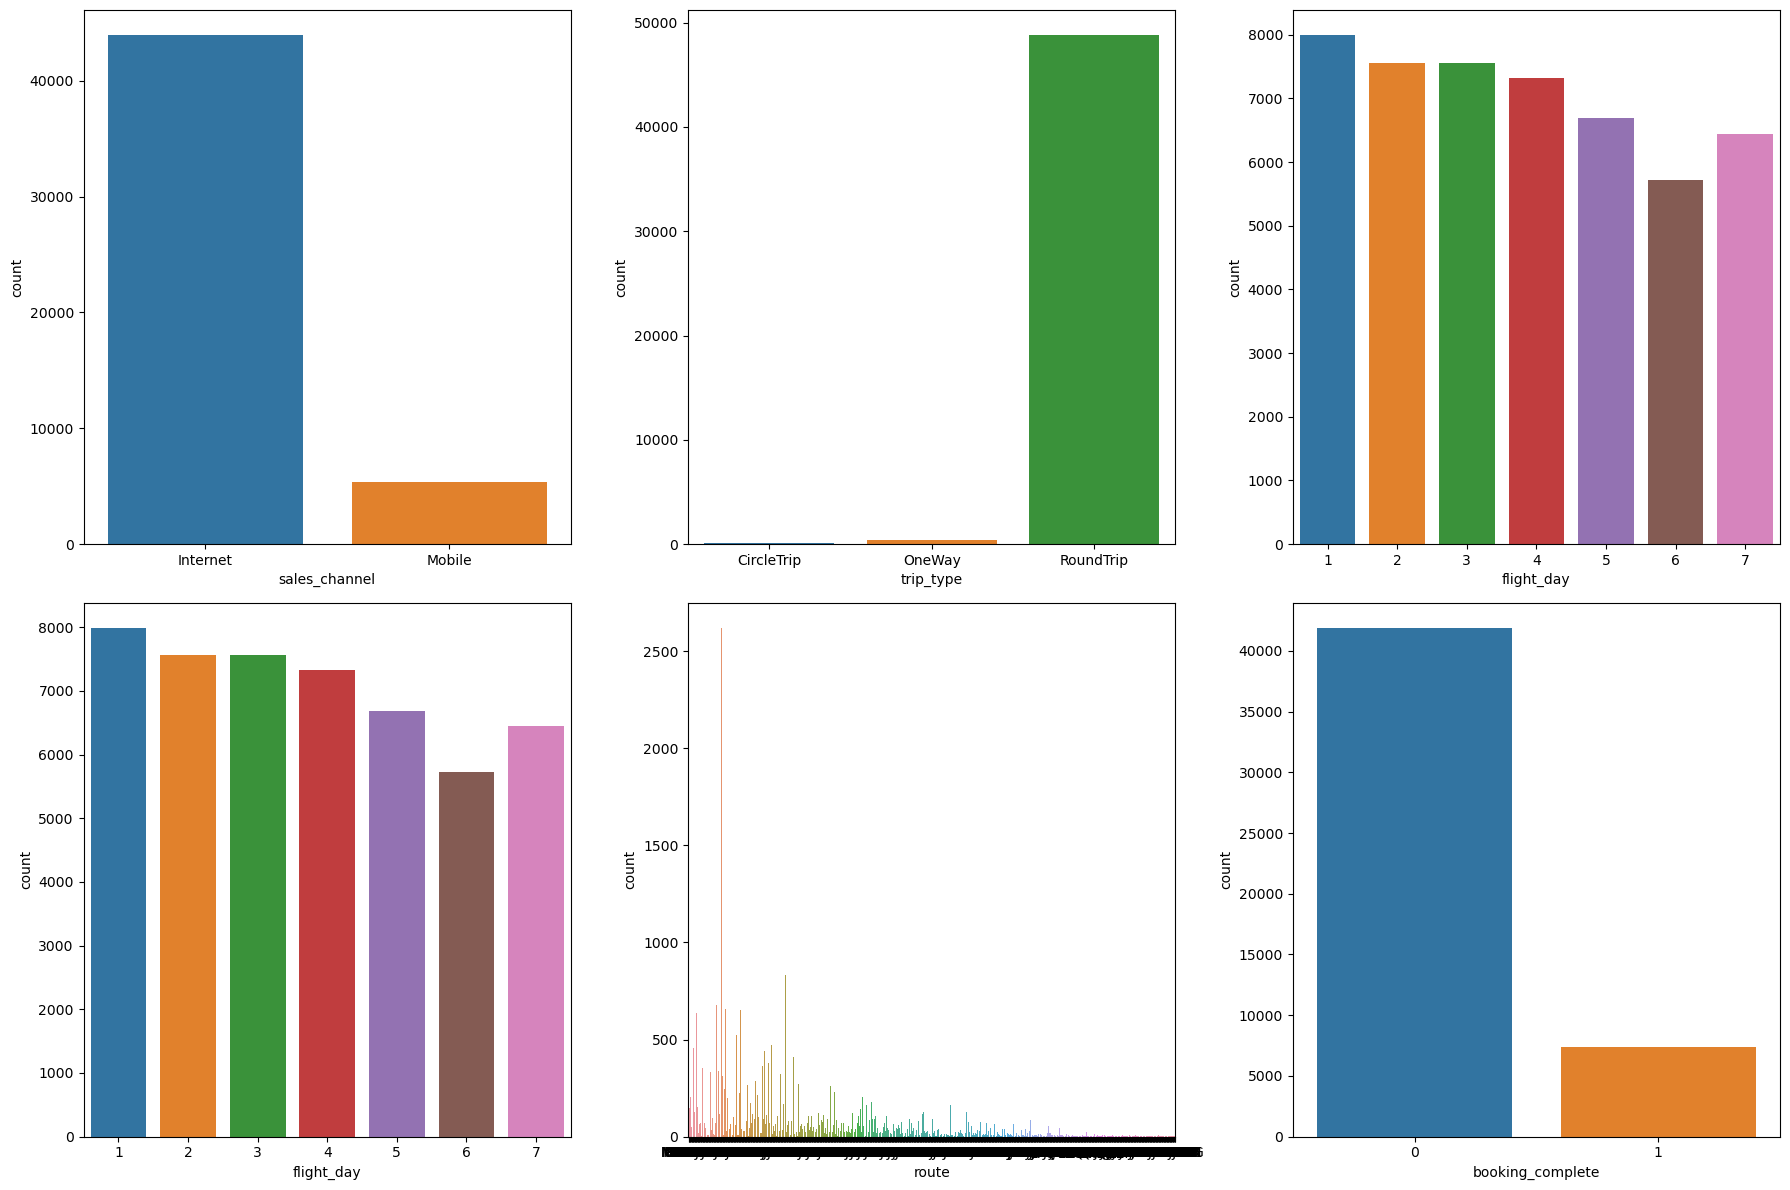

In [22]:
# Plot bar plots for categorical variables
categorical_vars = ['sales_channel', 'trip_type', 'flight_day', 'flight_day', 'route', 'booking_complete']
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
for i, var in enumerate(categorical_vars):
    row = i // 3
    col = i % 3
    sns.countplot(x=var, data=df, ax=axes[row, col])
plt.tight_layout()
plt.show()

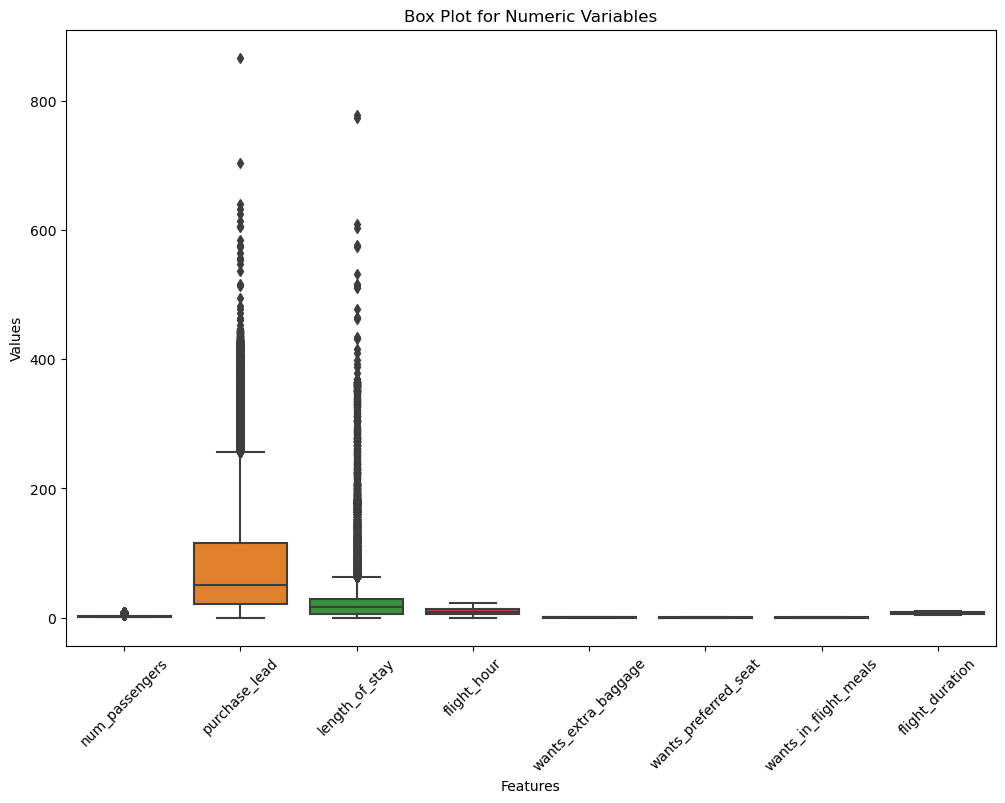

In [23]:
numeric_vars_1 = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration']

# Plot box plots for numeric variables
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_vars_1])
plt.title("Box Plot for Numeric Variables")
plt.xlabel("Features")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

OUTLIERS:
- purchase lead has outliers
- length of stay has outliers
- num passengers has outliers

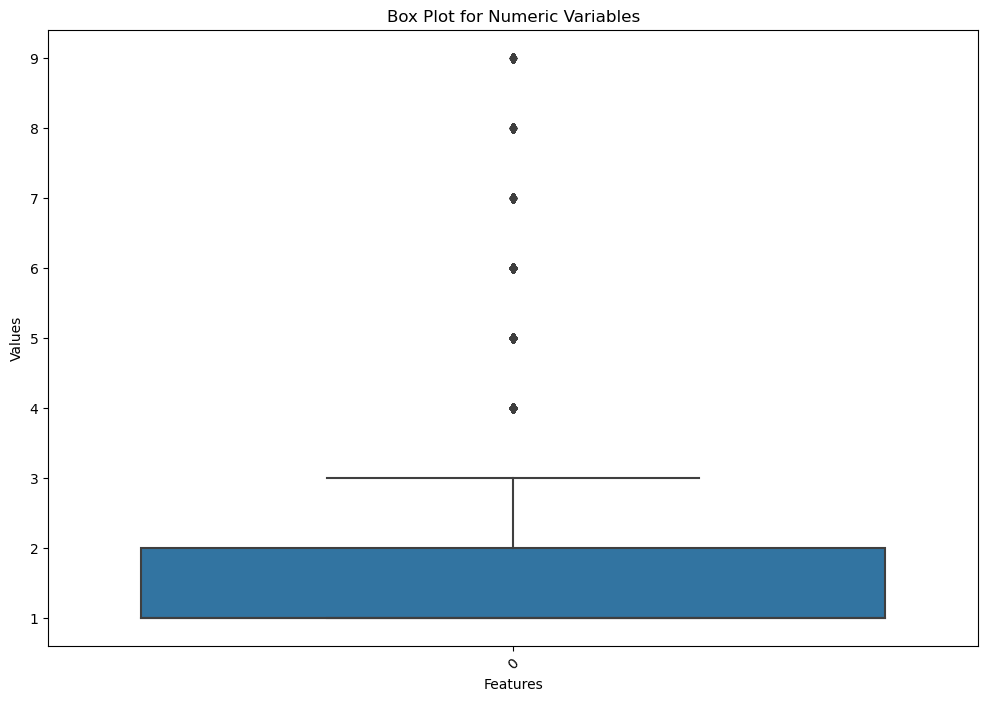

In [25]:
# Plot box plots for numeric variables
plt.figure(figsize=(12, 8))
sns.boxplot(data=df['num_passengers'])
plt.title("Box Plot for Numeric Variables")
plt.xlabel("Features")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

### Feature Engineering 
This involves creating new features or transforming existing ones to improve the predictive power of the model. This process may include tasks such as:

- Creating new features based on domain knowledge or insights gained from data exploration.
- Transforming existing features through scaling, normalization, or encoding.
- Handling missing values or outliers in the data.
- Selecting relevant features and removing irrelevant or redundant ones.

#### Handling Outliers
- Did this using Data Transformation in the columns with outliers

- **Log Transformation:** This method involves taking the logarithm of the values, which can help stabilize variance and make the data more symmetric. Log transformation is particularly useful for data that exhibit exponential growth or decay.
- **Square Root Transformation:** Similar to log transformation, square root transformation reduces the magnitude of large values while preserving the order of values. It can be effective for data with right-skewed distributions.
- **Box-Cox Transformation:** The Box-Cox transformation is a family of power transformations that includes both log and square root transformations as special cases. It can automatically determine the optimal transformation parameter lambda for the data.
- **Winsorization:** Winsorization involves replacing extreme values (outliers) with less extreme values, typically by capping or truncating them at a specified percentile of the data distribution.
- **Standardization:** Standardization (or z-score normalization) transforms the data to have a mean of zero and a standard deviation of one. While it doesn't specifically address outliers, standardization can make the data more comparable and suitable for certain algorithms that assume standardized input features.

In [28]:
# Define the columns with outliers
columns_with_outliers = ['purchase_lead', 'length_of_stay', 'num_passengers']

# Create a new DataFrame to store transformed data
df_transed = df.copy()

# Apply data transformation methods
for column in columns_with_outliers:
    # Log transformation
    df_transed[column + '_log'] = np.log1p(df[column])  # Adding 1 to handle zero values

    # Square root transformation
    df_transed[column + '_sqrt'] = np.sqrt(df[column])

    # Box-Cox transformation
    transformed_data, lambda_value = boxcox(df[column] + 1)  # Adding 1 to handle zero values
    df_transed[column + '_boxcox'] = transformed_data


In [29]:
df_transed.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,...,size,purchase_lead_log,purchase_lead_sqrt,purchase_lead_boxcox,length_of_stay_log,length_of_stay_sqrt,length_of_stay_boxcox,num_passengers_log,num_passengers_sqrt,num_passengers_boxcox
0,1,Internet,CircleTrip,0,6,9,7,MELPEN,Australia,1,...,1,0.000000,0.000000,0.000000,1.945910,2.449490,1.542276,0.693147,1.0,0.284073
1,1,Internet,CircleTrip,5,18,4,3,MELPVG,Australia,1,...,1,1.791759,2.236068,2.096949,2.944439,4.242641,2.086899,0.693147,1.0,0.284073
2,1,Internet,CircleTrip,6,26,11,2,OOLTPE,Australia,1,...,1,1.945910,2.449490,2.309226,3.295837,5.099020,2.248550,0.693147,1.0,0.284073
3,1,Internet,CircleTrip,7,1,11,6,KNOTPE,Taiwan,1,...,1,2.079442,2.645751,2.497691,0.693147,1.000000,0.636636,0.693147,1.0,0.284073
4,1,Internet,CircleTrip,9,80,1,2,MELMRU,Australia,1,...,1,2.302585,3.000000,2.822411,4.394449,8.944272,2.671652,0.693147,1.0,0.284073


In [30]:
import numpy as np

# Original numeric variables
numeric_vars_1 = ['num_passengers', 'purchase_lead', 'length_of_stay']

# Lists to store transformed variables
numeric_vars_log = []
numeric_vars_sqrt = []
numeric_vars_boxcox = []

# Apply data transformation methods
for column in numeric_vars_1:
    # Log transformation
    numeric_vars_log.append(column + '_log')

    # Square root transformation
    numeric_vars_sqrt.append(column + '_sqrt')

    # Box-Cox transformation
    numeric_vars_boxcox.append(column + '_boxcox')

# Print the lists
print("Numeric variables after Log Transformation:")
print(numeric_vars_log)
print("\nNumeric variables after Square Root Transformation:")
print(numeric_vars_sqrt)
print("\nNumeric variables after Box-Cox Transformation:")
print(numeric_vars_boxcox)

Numeric variables after Log Transformation:
['num_passengers_log', 'purchase_lead_log', 'length_of_stay_log']

Numeric variables after Square Root Transformation:
['num_passengers_sqrt', 'purchase_lead_sqrt', 'length_of_stay_sqrt']

Numeric variables after Box-Cox Transformation:
['num_passengers_boxcox', 'purchase_lead_boxcox', 'length_of_stay_boxcox']


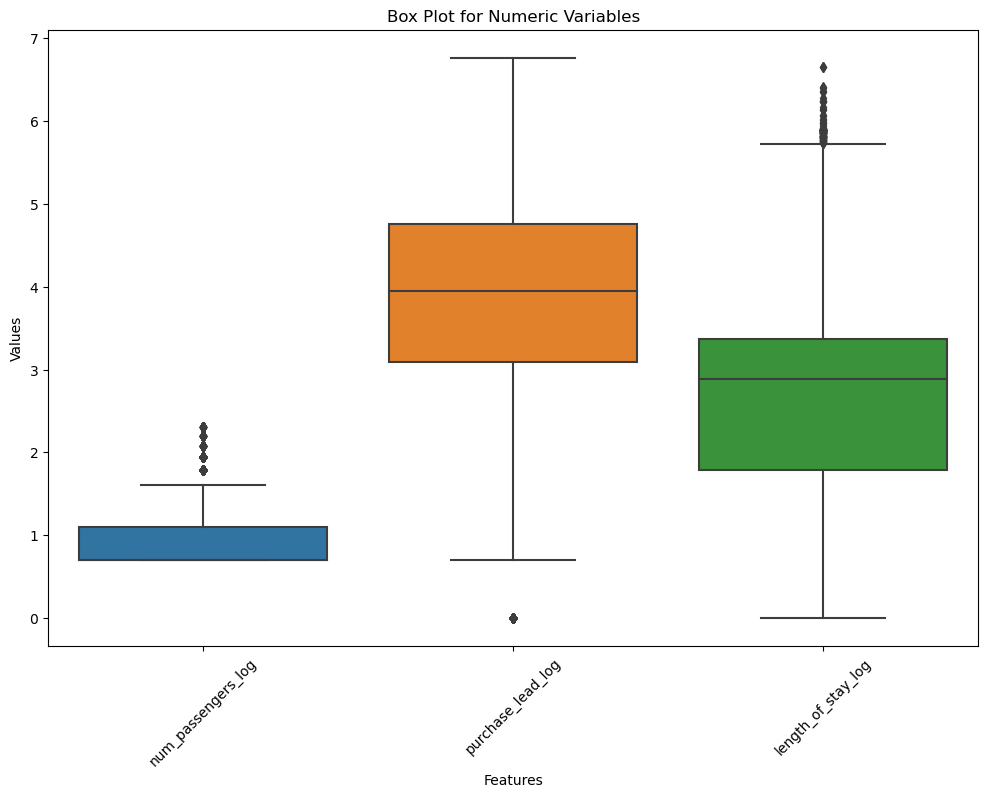

In [31]:
# Plot box plots for numeric variables
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_transed[numeric_vars_log])
plt.title("Box Plot for Numeric Variables")
plt.xlabel("Features")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

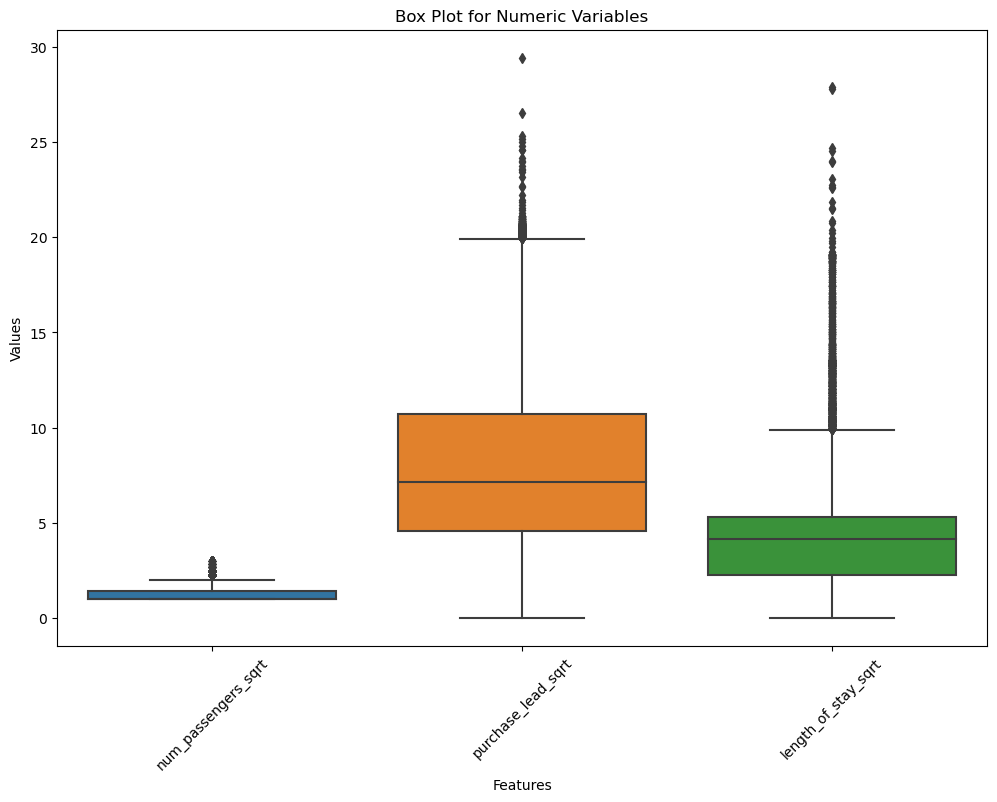

In [32]:
# Plot box plots for numeric variables
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_transed[numeric_vars_sqrt])
plt.title("Box Plot for Numeric Variables")
plt.xlabel("Features")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

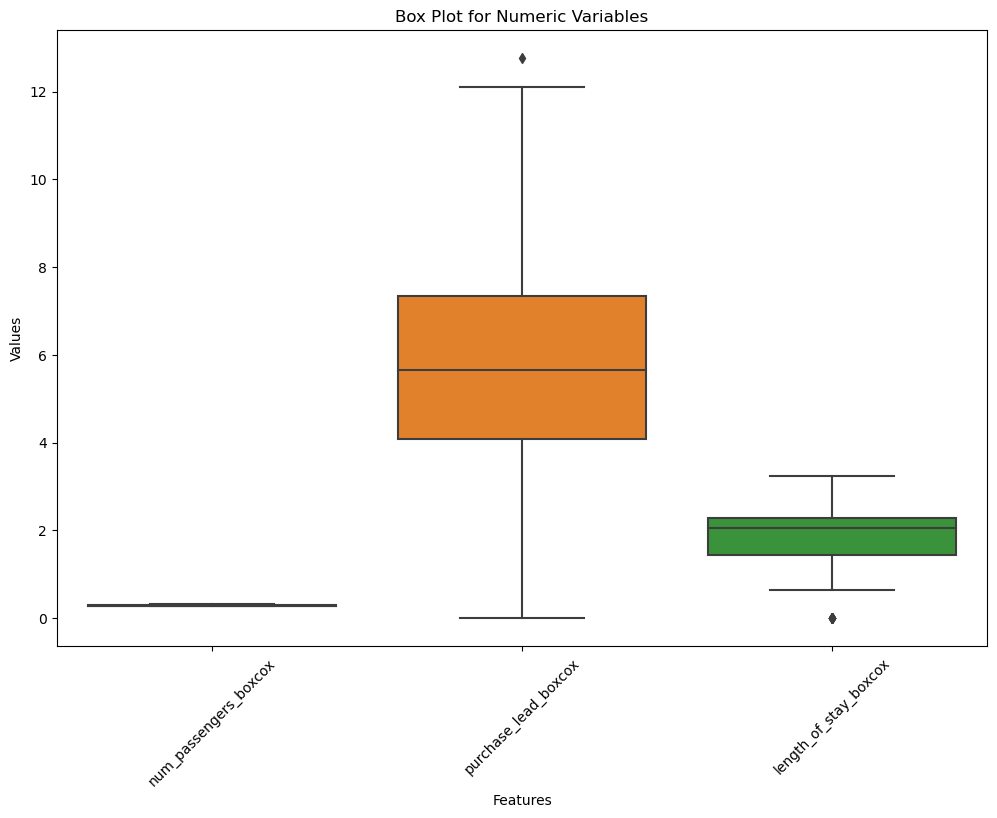

In [33]:
# Plot box plots for numeric variables
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_transed[numeric_vars_boxcox])
plt.title("Box Plot for Numeric Variables")
plt.xlabel("Features")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

In [34]:
# Create a new DataFrame to store transformed data
data = df.copy()

# Apply Box-Cox transformation to columns with outliers
for column in columns_with_outliers:
    transformed_data, _ = boxcox(data[column] + 1)  # Adding 1 to handle zero values
    data[column + '_boxcox'] = transformed_data

# Drop original columns with outliers
data.drop(columns=columns_with_outliers, inplace=True)

# Verify the new DataFrame
data.head()

,sales_channel,trip_type,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,size,purchase_lead_boxcox,length_of_stay_boxcox,num_passengers_boxcox
0,Internet,CircleTrip,9,7,MELPEN,Australia,1,0,0,8.83,0,1,0.000000,1.542276,0.284073
1,Internet,CircleTrip,4,3,MELPVG,Australia,1,1,1,8.83,0,1,2.096949,2.086899,0.284073
2,Internet,CircleTrip,11,2,OOLTPE,Australia,1,0,1,8.83,0,1,2.309226,2.248550,0.284073
3,Internet,CircleTrip,11,6,KNOTPE,Taiwan,1,0,1,4.67,0,1,2.497691,0.636636,0.284073
4,Internet,CircleTrip,1,2,MELMRU,Australia,1,0,0,8.83,0,1,2.822411,2.671652,0.284073


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49281 entries, 0 to 49280
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sales_channel          49281 non-null  object 
 1   trip_type              49281 non-null  object 
 2   flight_hour            49281 non-null  int64  
 3   flight_day             49281 non-null  int64  
 4   route                  49281 non-null  object 
 5   booking_origin         49281 non-null  object 
 6   wants_extra_baggage    49281 non-null  int64  
 7   wants_preferred_seat   49281 non-null  int64  
 8   wants_in_flight_meals  49281 non-null  int64  
 9   flight_duration        49281 non-null  float64
 10  booking_complete       49281 non-null  int64  
 11  size                   49281 non-null  int64  
 12  purchase_lead_boxcox   49281 non-null  float64
 13  length_of_stay_boxcox  49281 non-null  float64
 14  num_passengers_boxcox  49281 non-null  float64
dtypes:

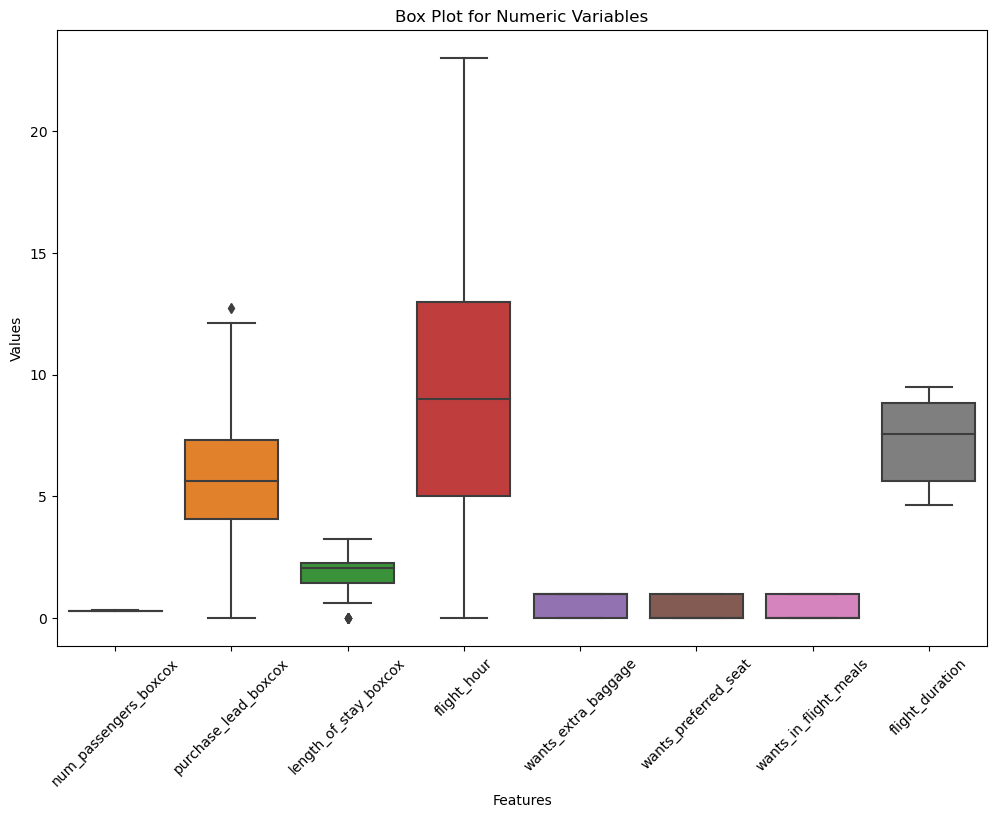

In [36]:
numeric_vars_transed = ['num_passengers_boxcox', 'purchase_lead_boxcox', 'length_of_stay_boxcox', 'flight_hour', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration']

# Plot box plots for numeric variables
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[numeric_vars_transed])
plt.title("Box Plot for Numeric Variables")
plt.xlabel("Features")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

In [37]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,size
0,1,Internet,CircleTrip,0,6,9,7,MELPEN,Australia,1,0,0,8.83,0,1
1,1,Internet,CircleTrip,5,18,4,3,MELPVG,Australia,1,1,1,8.83,0,1
2,1,Internet,CircleTrip,6,26,11,2,OOLTPE,Australia,1,0,1,8.83,0,1
3,1,Internet,CircleTrip,7,1,11,6,KNOTPE,Taiwan,1,0,1,4.67,0,1
4,1,Internet,CircleTrip,9,80,1,2,MELMRU,Australia,1,0,0,8.83,0,1


## Model Selection And Training 

/Users/gabe/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Performance Metrics:
           Random Forest  Logistic Regression
Accuracy        0.843766             0.844679
Precision       0.510417             0.533333
Recall          0.126615             0.087855
F1-score        0.202899             0.150860
ROC-AUC         0.551994             0.536767


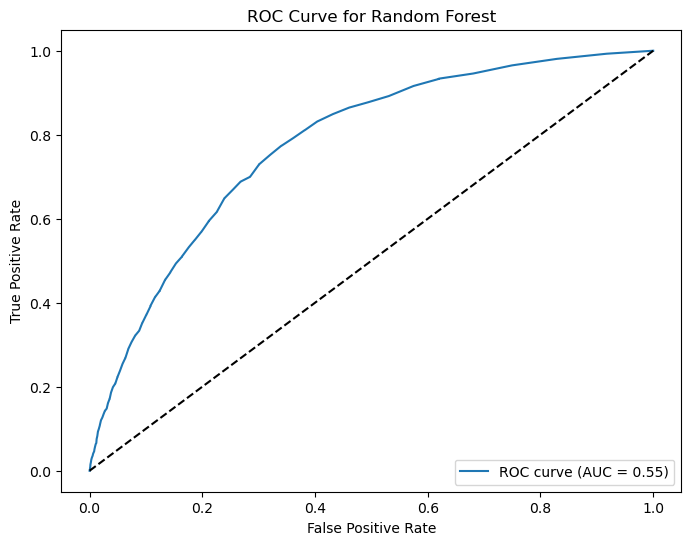

In [39]:
# Define features and target variable
X = data.drop(columns=['booking_complete'])
y = data['booking_complete']

# Perform one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X, columns=['sales_channel', 'trip_type', 'route', 'booking_origin'])

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    # "K Nearest Neighbor": KNeighborsClassifier(),
    # "Naive Bayes": GaussianNB()
}

# Train and evaluate models
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred)
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1, 'ROC-AUC': roc_auc}

# Print results
print("Performance Metrics:")
print(pd.DataFrame(results))

# Plot ROC curve for the best performing model
best_model_name = max(results, key=lambda x: results[x]['ROC-AUC'])
best_model = classifiers[best_model_name]
y_pred_proba = best_model.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {results[best_model_name]['ROC-AUC']:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {best_model_name}')
plt.legend(loc='lower right')
plt.show()

Now, interpreting the values in the table:

Random Forest: The model achieved an accuracy of 84.38%, precision of 51.04%, recall of 12.66%, F1-score of 20.29%, and ROC-AUC of 55.20%.
Support Vector Machine (SVM): The model achieved an accuracy of 84.30%, precision of 0.00% (no positive predictions), recall of 0.00%, F1-score of 0.00%, and ROC-AUC of 50.00%.
Logistic Regression: The model achieved an accuracy of 84.47%, precision of 53.33%, recall of 8.79%, F1-score of 15.09%, and ROC-AUC of 53.68%.

In [41]:
# Initialize a DataFrame to store actual and predicted values
results_df = pd.DataFrame({'Actual': y_val})

# Add predicted values for each model to the DataFrame
for name, clf in classifiers.items():
    y_pred = clf.predict(X_val)
    results_df[name + '_Predicted'] = y_pred

# Print the results DataFrame
print("Actual vs. Predicted Values:")
print(results_df)

Actual vs. Predicted Values:
       Actual  Random Forest_Predicted  Logistic Regression_Predicted
18476       0                        0                              0
41858       0                        0                              0
6483        0                        0                              0
20885       0                        0                              0
3931        0                        0                              0
...       ...                      ...                            ...
3875        0                        0                              0
6868        0                        0                              0
7028        0                        0                              0
25775       0                        0                              0
4346        0                        0                              0

[9857 rows x 3 columns]


In [42]:
results_df.head()

,Actual,Random Forest_Predicted,Logistic Regression_Predicted
18476,0,0,0
41858,0,0,0
6483,0,0,0
20885,0,0,0
3931,0,0,0


In [43]:
results_df['Random Forest_Predicted'].unique()

array([0, 1])

In [46]:
results_df['Logistic Regression_Predicted'].unique()

array([0, 1])

In [48]:
# Define features and target variable
X = data.drop(columns=['booking_complete'])
y = data['booking_complete']

# Perform one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X, columns=['sales_channel', 'trip_type', 'route', 'booking_origin'])

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    "K Nearest Neighbor": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate models
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred)
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1, 'ROC-AUC': roc_auc}

# Print results
print("Performance Metrics:")
print(pd.DataFrame(results))

# Plot ROC curve for the best performing model
best_model_name = max(results, key=lambda x: results[x]['ROC-AUC'])
best_model = classifiers[best_model_name]
y_pred_proba = best_model.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {results[best_model_name]['ROC-AUC']:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {best_model_name}')
plt.legend(loc='lower right')
plt.show()

AttributeError: 'Flags' object has no attribute 'c_contiguous'